<a href="https://colab.research.google.com/github/hereagain-Y/TF_tutorial/blob/main/VAE_revise_615.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

from six.moves import xrange



In [2]:
data=pd.read_csv("/content/drive/MyDrive/DL/VAE/rep_00148.tsv",
            sep="\t")
comp_seq=data["amino_acid"].tolist()
seq='IHTGCYRTQYNQGNK'
print(comp_seq)


['WPPHRNQASTKCLNNMQ', 'PLQEDGMNNDH', 'MFRQLIPEIIC', 'TLRQMCHKHKVV', 'SNRWDGRSIWHVDKAYH', 'EHMCIQGNFLAGLVS', 'YITNHHNVPLIAFWY', 'NYLHGNGSWSVSGIPF', 'YIAFWMIDMG', 'LAEEMGRCPI', 'PCRWRHCEHTL', 'CEPWAGGVKYK', 'KDQGVWCHNLPDKYI', 'VSHCDKCREGQAISDMEHS', 'QCKFCTRDCWDSG', 'DYGGVGFTNCMY', 'VNDEMDWETQHGGVHQKT', 'RDCYQIKPHDINPTYE', 'SMKVQDFPTPSC', 'RWCLVKRIGHCMD', 'HMLQFHYQRGT', 'DPVECCWHLQLE', 'MTHRANSCGSK', 'TETIFIHWFSNIRQE', 'YVKLKTPLKGYFRYYIE', 'ETGMTHNWEVWSLHDYI', 'YYQIRGYRKDVMM', 'AHGNMAVKHSRDKPTWYM', 'TKLPRVTFWICGQPER', 'QSMSTMFAMKKQ', 'WCLHEQDSTWRWVAVNLE', 'YLYEATLMKR', 'GSCHIPMKYCWHTRGCFHN']


In [3]:
ONE_HOT = {'A': 0, 'C': 1, 'D': 2, 'E': 3, 'F': 4, 'G': 5, 'H': 6, 'I': 7, 'K': 8, 'L': 9,
                   'M': 10, 'N': 11, 'P': 12, 'Q': 13, 'R': 14, 'S': 15, 'T': 16, 'V': 17, 'W': 18, 'Y': 19}

Load tumorCDR3 data

In [4]:
s = []
my_file = open("/content/drive/My Drive/DL/VAE/NormalCDR3.txt", "r")
content_list = my_file.read().splitlines()
content_list=np.array(content_list)
print(content_list)



['CASSLKPNTEAFF' 'CASSAHIANYGYTF' 'CASSPRPNTEAFF' ... 'CASSVDVGYEQYF'
 'CASRLAGQETQYF' 'CASSVVPNTEAFF']


In [5]:
d= {} # bipphysics dictionary
with open("/content/drive/My Drive/DL/VAE/AAidx_PCA.txt") as f:
    next(f)
    for line in f.readlines():
        line=line.strip().split('\t') #
        AA=line[0]
        tag=0
        values=[]
        for PC in line[1:]:
            values.append(float(PC))
        if tag==1: 
            continue
        d[AA]=values
d # AA


{'A': [-0.970906026408001,
  -0.323681347371203,
  15.7206518221322,
  -0.508840655632075,
  3.7402185826504,
  -0.778796812231878,
  3.38667656384665,
  -0.913062747756598,
  3.00614750780962,
  -2.32919906002667,
  0.787021897929849,
  -1.8743796601396,
  1.53335388267698,
  1.3444609979428,
  3.35815928624532],
 'C': [-8.36918251369427,
  8.3031934498954,
  -6.6196694564762,
  13.8734139891373,
  8.59531323791867,
  9.79914818190207,
  1.26911186662177,
  -4.63752901352054,
  -0.983921565990354,
  4.3634243590938,
  2.34365256090458,
  0.343445840449375,
  1.18290876288827,
  0.0132558803925318,
  -0.696621502763574],
 'D': [18.126265894029,
  -2.147381547322,
  -0.252169840858429,
  2.31366106621094,
  6.52406371824222,
  -4.88386469358817,
  -9.13828093975311,
  -0.710243755381537,
  -2.10295526053507,
  -1.27865374462701,
  1.48217397992869,
  1.43032328912492,
  -4.04631610616374,
  5.72388975986284,
  -1.78674912966952],
 'E': [12.0315987413064,
  -13.3012190783805,
  8.2799538

In [6]:
# max length
#comp_seq=data["amino_acid"].tolist()
comp_seq=content_list
print(comp_seq)
max_len=-1 

for AA in comp_seq:
    if len(AA)>max_len:
        max_len=len(AA)
        #res=AA
print(max_len )

['CASSLKPNTEAFF' 'CASSAHIANYGYTF' 'CASSPRPNTEAFF' ... 'CASSVDVGYEQYF'
 'CASRLAGQETQYF' 'CASSVVPNTEAFF']
19


In [7]:
PC_length=len(d['C'])
def AAindexEncoding(Seq):
    length_seq=len(Seq)
    global max_len
    AAE=np.zeros([max_len,15])
    if length_seq<max_len:
        for amino in range(length_seq):
            AA=Seq[amino]# 
            AAE[amino,]=d[AA] # add PC value 
            
        for amino in range(length_seq,max_len):
            AAE[amino,]=np.zeros(15)
    else: 
        for amino in range(length_seq):
            AA=Seq[amino]# 
            AAE[amino,]=d[AA]
        
    #AAE=np.transpose(AAE.astype(np.float32)) # row as PC. and column as AA sequence 
    return AAE 
  
def GetFeatures(file):
    #sequence=file['amino_acid'].tolist()
    #sequence=np.array(sequence)
    #sequence = file.read().splitlines()
    #sequence=np.array(sequence)
    hot_encode=[]
    for seq in file:
        hot_encode.append(AAindexEncoding(seq))
    hot_encode=np.array(hot_encode)
    result=np.array(hot_encode)
    return(result) # dimension: number of sequence [15*length(sequence)]


r1=GetFeatures(content_list)



In [8]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import numpy as np

from tqdm import tqdm
from torchvision.utils import save_image, make_grid
from torch.utils.data import DataLoader, Subset
from sklearn.model_selection import train_test_split

Load data

In [9]:
# trabsform 
kwargs = {'num_workers': 1, 'pin_memory': True} 
r1_transform=torch.from_numpy(r1)
r1_transform=r1_transform.float()
train_ds, test_ds = torch.utils.data.random_split(r1_transform, (30000, 10000))
print(train_ds, test_ds)

train_loader = DataLoader(dataset=train_ds, batch_size=1000)
test_loader  = DataLoader(dataset=test_ds,  batch_size=1000)





<torch.utils.data.dataset.Subset object at 0x7f274024bf10> <torch.utils.data.dataset.Subset object at 0x7f2740089c10>


In [56]:
# set paramters:
cuda = True
DEVICE = torch.device("cuda" if cuda else "cpu")


batch_size = 1000

x_dim=285 # 19*15
hidden_dim = 256
hidden_dim2 = 128

latent_dim = 64

lr = 1e-3

epochs = 100

In [63]:
class Encoder(nn.Module):
    
    def __init__(self, input_dim, hidden_dim,hidden_dim2, latent_dim):
        super(Encoder, self).__init__()

        self.FC_input = nn.Linear(input_dim, hidden_dim)
        self.FC_input2 = nn.Linear(hidden_dim, hidden_dim)
        self.FC_input3 = nn.Linear(hidden_dim, hidden_dim2)
        self.FC_mean  = nn.Linear(hidden_dim2, latent_dim)
        self.FC_var   = nn.Linear (hidden_dim2, latent_dim)
        
        self.LeakyReLU = nn.LeakyReLU(0.2)
        
        self.training = True
        
    def forward(self, x):
        h_       = self.LeakyReLU(self.FC_input(x))
        h_       = self.LeakyReLU(self.FC_input2(h_))
        h_       = self.LeakyReLU(self.FC_input3(h_))
        mean     = self.FC_mean(h_)
        log_var  = self.FC_var(h_)                     # encoder produces mean and log of variance 
                                                       #             (i.e., parateters of simple tractable normal distribution "q"
        
        return mean, log_var

In [64]:
class Decoder(nn.Module):
    def __init__(self, latent_dim, hidden_dim,hidden_dim2, output_dim):
        super(Decoder, self).__init__()
        self.FC_hidden = nn.Linear(latent_dim, hidden_dim2)
        self.FC_hidden3 = nn.Linear(hidden_dim2, hidden_dim)
        self.FC_hidden2 = nn.Linear(hidden_dim, hidden_dim)
        self.FC_output = nn.Linear(hidden_dim, output_dim)
        
        self.LeakyReLU = nn.LeakyReLU(0.2)
        
    def forward(self, x):
        h     = self.LeakyReLU(self.FC_hidden(x))
        h     = self.LeakyReLU(self.FC_hidden3(h))
        h     = self.LeakyReLU(self.FC_hidden2(h))
        
        x_hat = torch.sigmoid(self.FC_output(h))
        return x_hat

In [65]:
class Model(nn.Module):
    def __init__(self, Encoder, Decoder):
        super(Model, self).__init__()
        self.Encoder = Encoder
        self.Decoder = Decoder
        
    def reparameterization(self, mean, var):
        epsilon = torch.randn_like(var).to(DEVICE)        # sampling epsilon        
        z = mean + var*epsilon                          # reparameterization trick
        return z
        
                
    def forward(self, x):
        mean, log_var = self.Encoder(x)
        z = self.reparameterization(mean, torch.exp(0.5 * log_var)) # takes exponential function (log var -> var) ]
        x_hat            = self.Decoder(z)
        
        return x_hat, mean, log_var

In [67]:
encoder = Encoder(input_dim=x_dim, hidden_dim=hidden_dim, hidden_dim2=hidden_dim2, latent_dim=latent_dim)
decoder = Decoder(latent_dim=latent_dim, hidden_dim = hidden_dim, hidden_dim2=hidden_dim2,output_dim = x_dim)

model = Model(Encoder=encoder, Decoder=decoder).to(DEVICE)

In [68]:
from torch.optim import Adam

BCE_loss = nn.BCELoss()

def loss_function(x, x_hat, mean, log_var):
    reproduction_loss = nn.functional.binary_cross_entropy(x_hat, x, reduction='sum')
    KLD      = - 0.5 * torch.sum(1+ log_var - mean.pow(2) - log_var.exp())

    return reproduction_loss + KLD


optimizer = Adam(model.parameters(), lr=lr)

In [69]:
print("Start training VAE...")
model.train()

for epoch in range(epochs):
    overall_loss = 0
    overall_testloss= 0
    train_loss= []
    testtoal_loss= []
    for batch_idx, x in enumerate(train_loader):
        x = x.view(1000, x_dim)
        x = x.to(DEVICE)

        optimizer.zero_grad()

        x_hat, mean, log_var = model(x)
        loss = loss_function(x, x_hat, mean, log_var)
        overall_loss += loss.item()
        train_loss.append(loss.item())
        
        loss.backward()
       
        #optimizer.step()
      #test loss
    for batch_idx, x in enumerate(test_loader):
        x = x.view(1000, x_dim)
        x = x.to(DEVICE)

        optimizer.zero_grad()

        pred, mean, log_var = model(x)
        test_loss = loss_function(x, pred, mean, log_var)
        overall_testloss += test_loss.item()
        testtoal_loss.append(test_loss.item())
        
        test_loss.backward()
       
        optimizer.step()
        
        
        
    print("\tEpoch", epoch + 1, "complete!", "\tAverage Loss: ", overall_loss / (batch_idx*batch_size),
         "\tAverage Test Loss: " , overall_testloss/(batch_idx*batch_size))
    
print("Finish!!")

Start training VAE...
	Epoch 1 complete! 	Average Loss:  655.6603524305556 	Average Test Loss:  -275.25421549479165
	Epoch 2 complete! 	Average Loss:  -24807.776388888888 	Average Test Loss:  -23915.606888888888
	Epoch 3 complete! 	Average Loss:  -79010.508 	Average Test Loss:  -28340.38111111111
	Epoch 4 complete! 	Average Loss:  -83912.22822222223 	Average Test Loss:  -30091.331777777777
	Epoch 5 complete! 	Average Loss:  -92967.86133333333 	Average Test Loss:  -32215.624666666667
	Epoch 6 complete! 	Average Loss:  -99025.50333333333 	Average Test Loss:  -33275.03911111111
	Epoch 7 complete! 	Average Loss:  -100617.16377777778 	Average Test Loss:  -33277.53288888889
	Epoch 8 complete! 	Average Loss:  -99952.996 	Average Test Loss:  -33301.98511111111
	Epoch 9 complete! 	Average Loss:  -100673.74622222222 	Average Test Loss:  -33392.989111111114
	Epoch 10 complete! 	Average Loss:  -101114.99844444444 	Average Test Loss:  -33714.60088888889
	Epoch 11 complete! 	Average Loss:  -102057.7

Create sequence 

Plot Loss

In [70]:
len(train_loss)
len(testtoal_loss)

10

In [71]:
#train_res_recon_error_smooth=savgol_filter(, 99, 7) # 201 window length
train_error_smooth = savgol_filter(train_loss, 29, 7)
test_error_smooth = savgol_filter(testtoal_loss, 9, 7)


Text(0.5, 0, 'iteration')

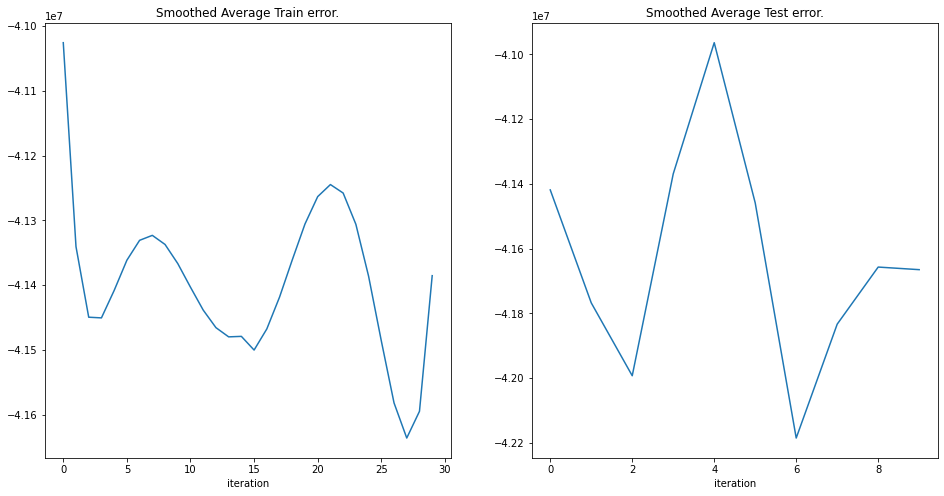

In [72]:
f = plt.figure(figsize=(16,8))
ax = f.add_subplot(1,2,1)
ax.plot(train_error_smooth)
#ax.set_yscale('log')
ax.set_title('Smoothed Average Train error.')
ax.set_xlabel('iteration')

ax = f.add_subplot(1,2,2)
ax.plot(test_error_smooth)
ax.set_title('Smoothed Average Test error.')
ax.set_xlabel('iteration')